In [41]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import plotly.express as px

In [42]:
# now

conn = sqlite3.connect('MunsterAutoScout24.sqlite')
Munster_df = pd.read_sql_query("SELECT * FROM Munster", conn)
AutoScout24_df = pd.read_sql_query("SELECT * FROM AutoScout24", conn)

print(Munster_df.columns)
print(Munster_df.head(5))

Index(['year', 'zipCode', 'registration_district', 'total_wheeled_vehicles',
       'two-wheeled', 'three-wheeled', 'four-wheeled', 'female_owners',
       'home_vehicles', 'emergency_vehicles', 'commercial_owners',
       'tractor_units', 'forest_vehicles'],
      dtype='object')
     year  zipCode registration_district  total_wheeled_vehicles  two-wheeled  \
0  2022.0   5512.0         BOTTROP,STADT                  6540.0       6398.0   
1  2022.0   5513.0   GELSENKIRCHEN,STADT                  9564.0       9265.0   
2  2022.0   5515.0        MUENSTER,STADT                 11038.0      10802.0   
3  2022.0   5554.0                BORKEN                 17873.0      17282.0   
4  2022.0   5558.0              COESFELD                 13223.0      12815.0   

   three-wheeled  four-wheeled  female_owners  home_vehicles  \
0           65.0          77.0          850.0          785.0   
1          154.0         145.0         1258.0         1005.0   
2          136.0         100.0         

In [43]:
print(AutoScout24_df.columns)
print(AutoScout24_df.head(5))



Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')
   mileage     make        model      fuel       gear      offerType  price  \
0     8800    smart      forFour  Electric  Automatic  Demonstration  11890   
1    65243  Citroen  C3 Aircross  Gasoline     Manual           Used  12480   
2    30480     Opel      Mokka X  Gasoline     Manual           Used  13970   
3    39990     Ford     EcoSport  Gasoline     Manual           Used  14480   
4    21500    smart       forTwo  Electric  Automatic           Used  14480   

    hp  year  
0   82  2018  
1  110  2018  
2  140  2018  
3  125  2018  
4   56  2018  


### Descriptive Statistics

In [63]:
# Compute descriptive statistics for numerical columns in Munster_df
munster_stats = Munster_df.describe()
print(munster_stats)

# Compute descriptive statistics for numerical columns in AutoScout24_df
autoscout24_stats = AutoScout24_df.describe()
print(autoscout24_stats)


              year      zipCode  total_wheeled_vehicles   two-wheeled  \
count    40.000000    40.000000               40.000000     40.000000   
mean   2020.525000  5543.750000            15747.925000  15320.800000   
std       1.395735    24.299151             8106.314175   7916.011561   
min    2018.000000  5512.000000             6094.000000   5967.000000   
25%    2019.000000  5514.500000            10222.500000   9983.500000   
50%    2020.500000  5556.000000            13698.000000  13303.500000   
75%    2022.000000  5563.000000            18931.500000  18313.250000   
max    2024.000000  5570.000000            34032.000000  33314.000000   

       three-wheeled  four-wheeled  female_owners  home_vehicles  \
count      40.000000     40.000000      40.000000      40.000000   
mean      145.150000    281.975000    2180.600000    2581.750000   
std        70.697097    155.927907    1169.428675    1381.796689   
min        43.000000     64.000000     806.000000     459.000000   
25

### Distribution Analysis

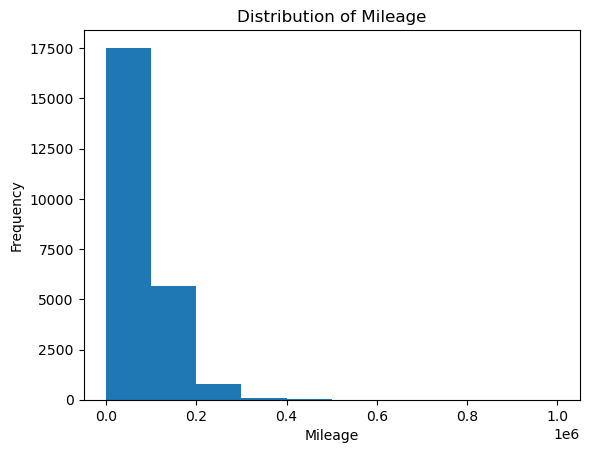

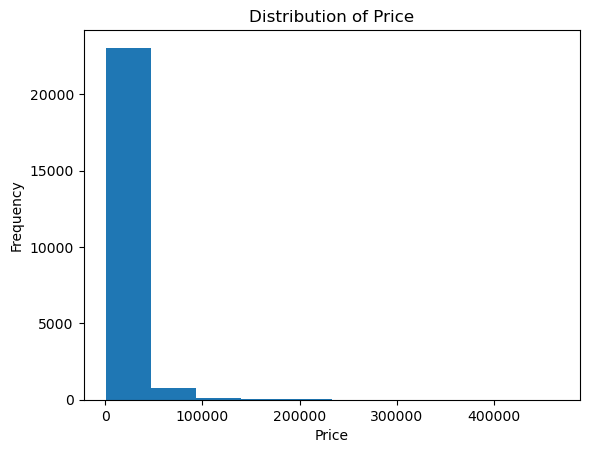

In [64]:
import matplotlib.pyplot as plt

# Plot histogram for the 'mileage' column in AutoScout24_df
plt.hist(AutoScout24_df['mileage'], bins=10)
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage')
plt.show()

# Plot histogram for the 'price' column in AutoScout24_df
plt.hist(AutoScout24_df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


### Categorical Analysis

In [65]:
# Calculate frequency counts for the 'make' column in AutoScout24_df
make_counts = AutoScout24_df['make'].value_counts()
print(make_counts)

# Calculate frequency counts for the 'fuel' column in AutoScout24_df
fuel_counts = AutoScout24_df['fuel'].value_counts()
print(fuel_counts)

# Calculate frequency counts for the 'gear' column in AutoScout24_df
gear_counts = AutoScout24_df['gear'].value_counts()
print(gear_counts)


Volkswagen    3452
Opel          2188
Ford          2163
Renault       1662
Skoda         1526
              ... 
Isuzu            1
Aixam            1
FISKER           1
RAM              1
Morgan           1
Name: make, Length: 70, dtype: int64
Gasoline             14750
Diesel                8037
Electric/Gasoline      637
Electric               452
CNG                     58
LPG                     57
Electric/Diesel         29
Others                  28
-/- (Fuel)              11
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64
Manual            14913
Automatic          9008
0                   109
Semi-automatic       32
Name: gear, dtype: int64


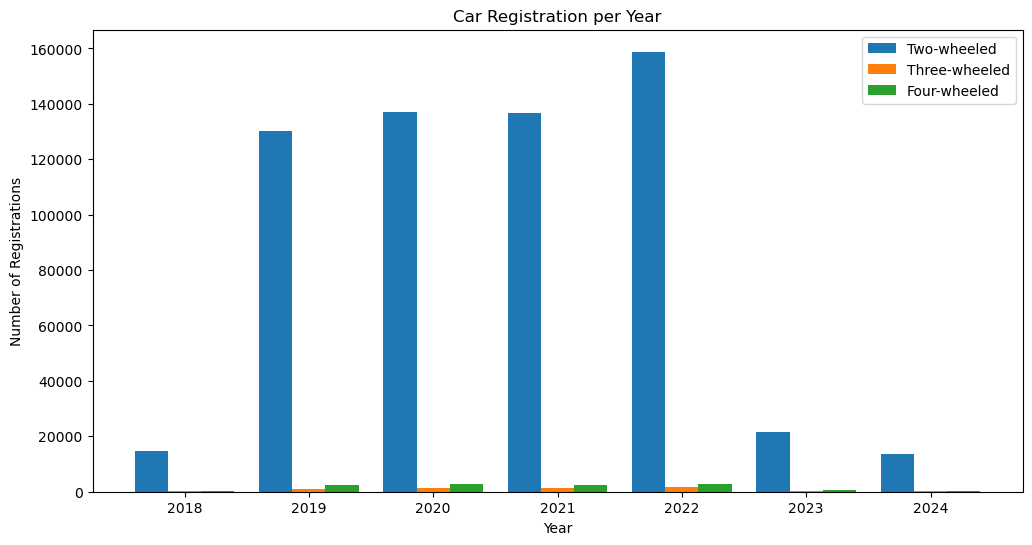

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have loaded the Munster_df dataset into a DataFrame: Munster_df

# Filter out rows where the 'year' value is 0
Munster_df = Munster_df[Munster_df['year'] != 0]

# Select the columns of interest
columns_of_interest = ['year', 'two-wheeled', 'three-wheeled', 'four-wheeled']

# Group the dataset by Year and calculate the sum of each selected column for each year
registration_per_year = Munster_df.groupby('year')[columns_of_interest].sum()

# Convert the 'year' column to integers
registration_per_year.index = registration_per_year.index.astype(int)

# Increase the figure width
plt.figure(figsize=(12, 6))

# Extracting only the 'year' column for the x-axis
x_values = registration_per_year.index

# Get the number of items (excluding 'year')
num_items = len(columns_of_interest) - 1

# Set the width of each bar
bar_width = 0.8 / num_items

# Plotting the car registration per year as separate bars
for i, item in enumerate(columns_of_interest[1:]):
    plt.bar(x_values + (i - num_items/2 + 0.5) * bar_width, registration_per_year[item], width=bar_width,
            label=item.capitalize())

# Set plot title and labels
plt.title('Car Registration per Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')

# Show the legend
plt.legend()

# Display the plot
plt.show()


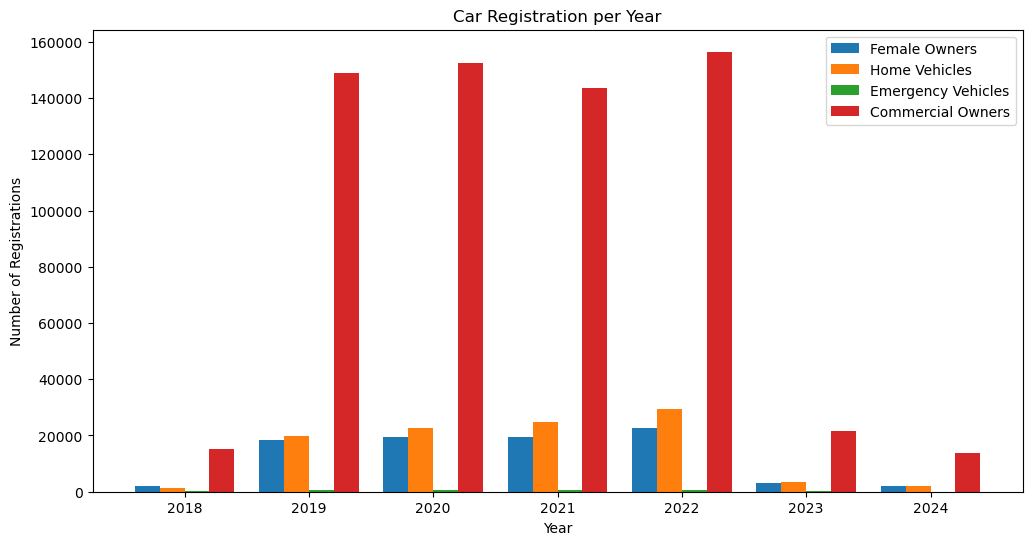

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have loaded the Munster_df dataset into a DataFrame: Munster_df

# Filter out rows where the 'year' value is 0
Munster_df = Munster_df[Munster_df['year'] != 0]

# Select the columns of interest
columns_of_interest = ['year', 'female_owners', 'home_vehicles', 'emergency_vehicles', 'commercial_owners']

# Group the dataset by Year and calculate the sum of each selected column for each year
registration_per_year = Munster_df.groupby('year')[columns_of_interest].sum()

# Convert the 'year' column to integers
registration_per_year.index = registration_per_year.index.astype(int)

# Increase the figure width
plt.figure(figsize=(12, 6))

# Extracting only the 'year' column for the x-axis
x_values = registration_per_year.index

# Get the number of items (excluding 'year')
num_items = len(columns_of_interest) - 1

# Set the width of each bar
bar_width = 0.8 / num_items

# Plotting the car registration per year as separate bars
for i, item in enumerate(columns_of_interest[1:]):
    plt.bar(x_values + (i - num_items/2 + 0.5) * bar_width, registration_per_year[item], width=bar_width,
            label=item.replace('_', ' ').title())

# Set plot title and labels
plt.title('Car Registration per Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')

# Show the legend
plt.legend()

# Display the plot
plt.show()


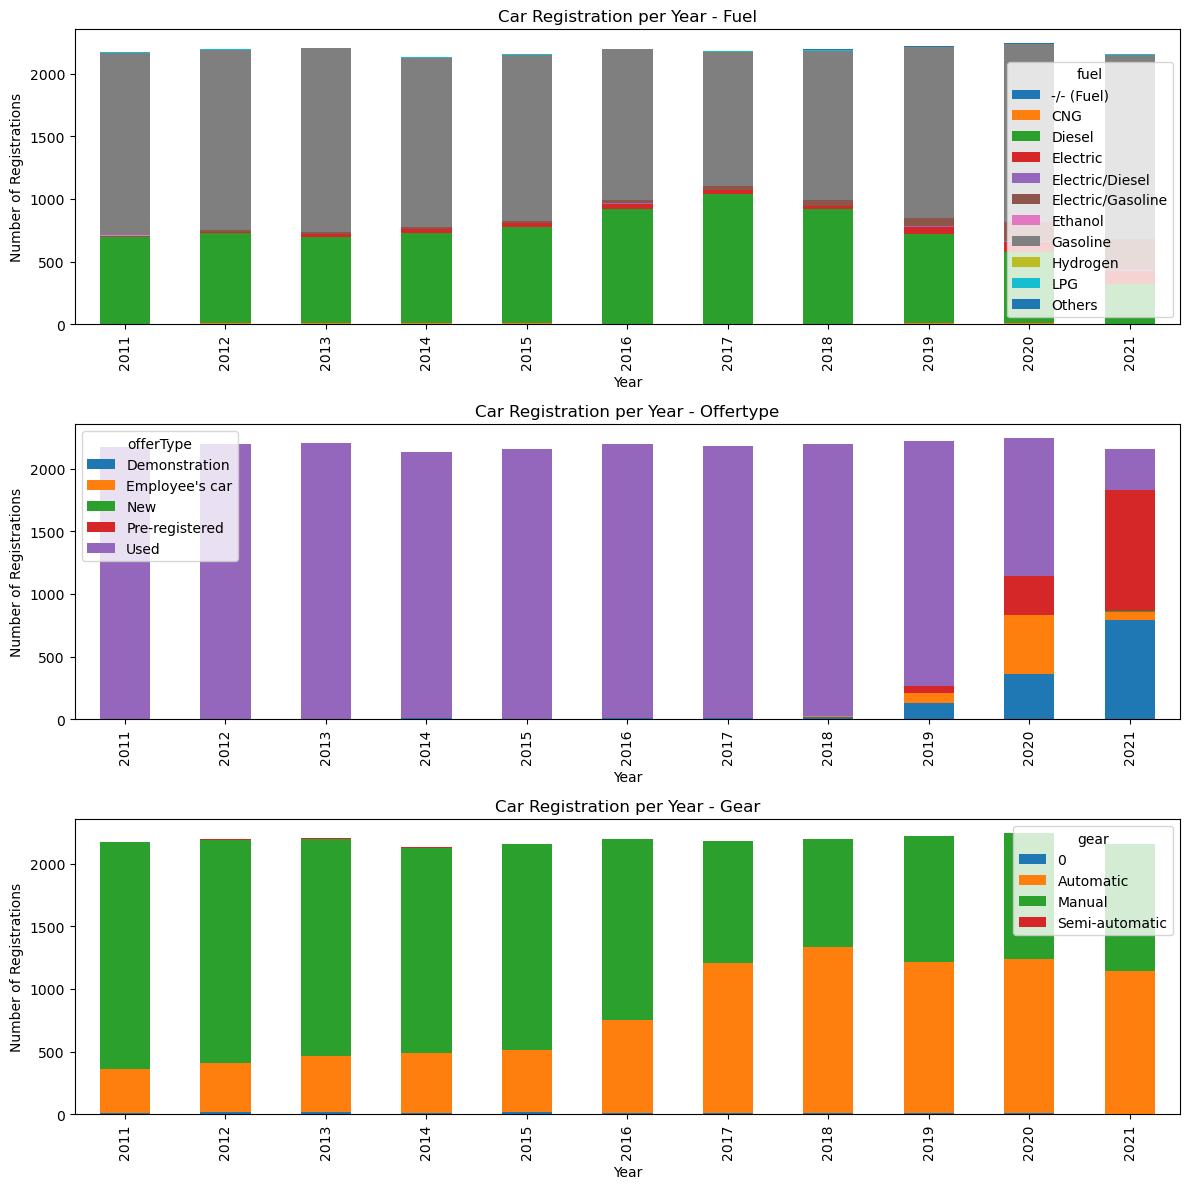

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have loaded the AutoScout24_df dataset into a DataFrame: AutoScout24_df

# Convert the 'year' column to string type
AutoScout24_df['year'] = AutoScout24_df['year'].astype(str)

# Select the columns of interest
columns_of_interest = ['year', 'fuel', 'offerType', 'gear']

# Increase the figure width
plt.figure(figsize=(12, 12))

# Create subplots for each category
num_categories = len(columns_of_interest) - 1
for i, category in enumerate(columns_of_interest[1:]):
    plt.subplot(num_categories, 1, i+1)
    # Group the dataset by Year and count the occurrences of each category for each year
    registration_per_year = AutoScout24_df.groupby('year')[category].value_counts().unstack()
    # Plotting the bar plot for the current category
    registration_per_year.plot(kind='bar', stacked=True, ax=plt.gca())
    # Set plot title and labels
    plt.title(f'Car Registration per Year - {category.capitalize()}')
    plt.xlabel('Year')
    plt.ylabel('Number of Registrations')

# Adjust the layout of subplots
plt.tight_layout()

# Display the plot
plt.show()


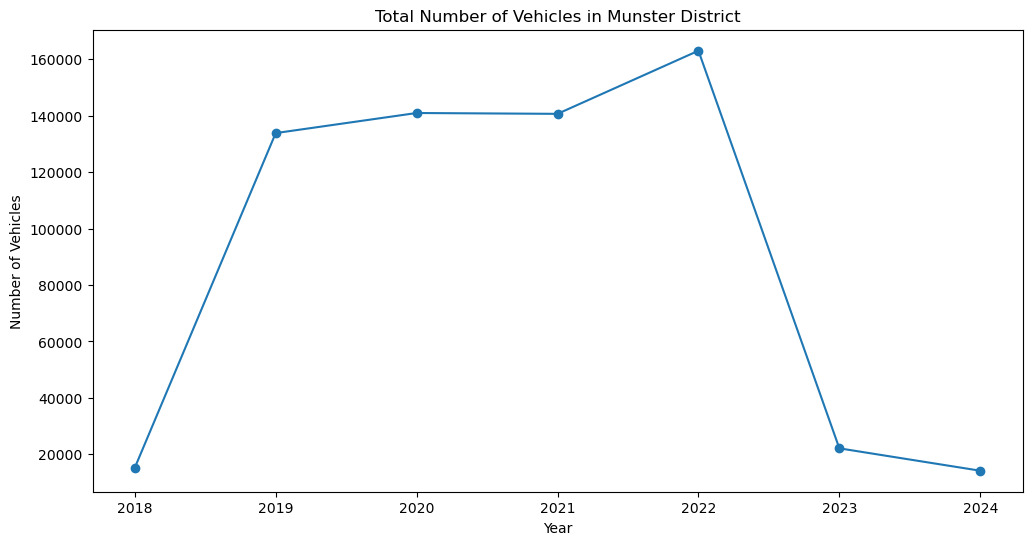

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Temporal Analysis

# Convert the 'Year' column to a suitable data type
Munster_df['year'] = Munster_df['year'].astype(int)
AutoScout24_df['year'] = AutoScout24_df['year'].astype(int)

# Step 5: Aggregation and Visualization

# Group the Munster_df dataset by 'year' and calculate the total number of vehicles for each year
vehicle_counts_munster = Munster_df.groupby('year')['total_wheeled_vehicles'].sum()

# Plotting the total number of vehicles in Munster district over time
plt.figure(figsize=(12, 6))
plt.plot(vehicle_counts_munster.index, vehicle_counts_munster, marker='o')
plt.title('Total Number of Vehicles in Munster District')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.show()

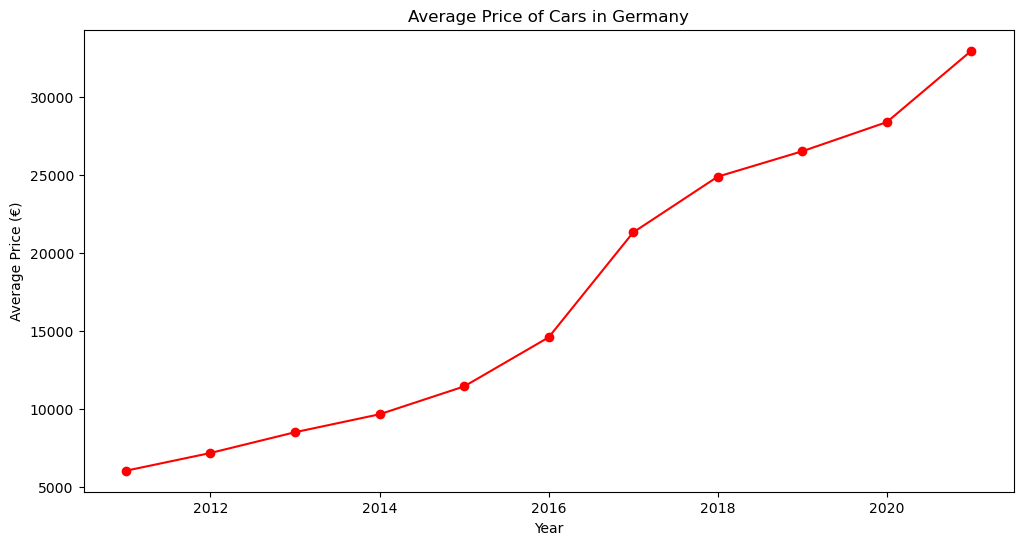

In [60]:
# Group the AutoScout24_df dataset by 'year' and calculate the average price for each year
average_price_autoscout24 = AutoScout24_df.groupby('year')['price'].mean()

# Plotting the average price of cars in Germany over time
plt.figure(figsize=(12, 6))
plt.plot(average_price_autoscout24.index, average_price_autoscout24, marker='o', color='r')
plt.title('Average Price of Cars in Germany')
plt.xlabel('Year')
plt.ylabel('Average Price (€)')
plt.show()


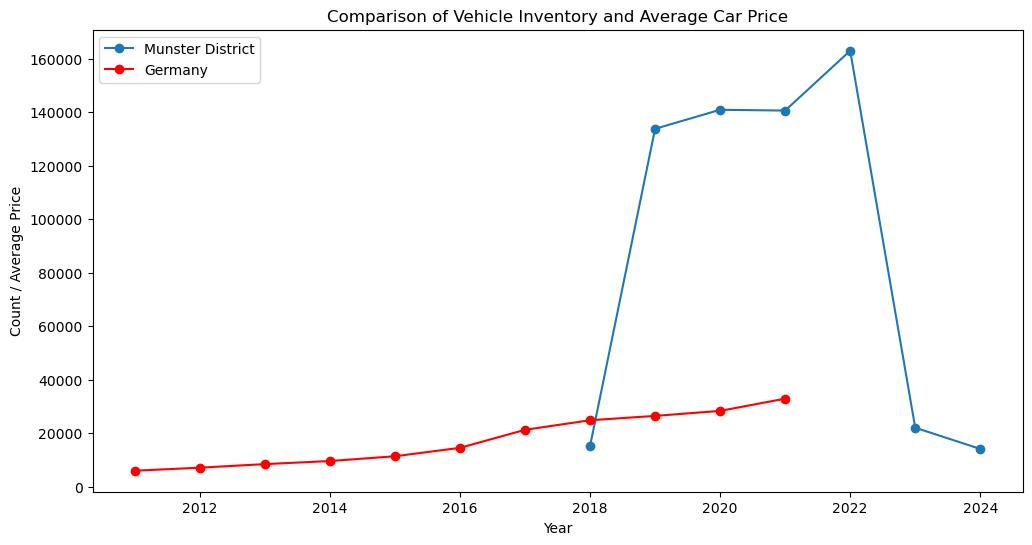

In [61]:
# Step 6: Comparison

# Overlaying the plots of total number of vehicles in Munster district and average price of cars in Germany
plt.figure(figsize=(12, 6))
plt.plot(vehicle_counts_munster.index, vehicle_counts_munster, marker='o', label='Munster District')
plt.plot(average_price_autoscout24.index, average_price_autoscout24, marker='o', color='r', label='Germany')
plt.title('Comparison of Vehicle Inventory and Average Car Price')
plt.xlabel('Year')
plt.ylabel('Count / Average Price')
plt.legend()
plt.show()


In [67]:
# Step 7: Statistical Analysis

# Calculate the correlation coefficient between the total number of vehicles in Munster district and average price of cars in Germany
correlation = vehicle_counts_munster.corr(average_price_autoscout24)
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: 0.6584786582045401


# Step 8: Interpretation and Insights


A correlation coefficient of 0.658 indicates a moderate positive correlation between the two variables. This means that there is a tendency for the total number of vehicles in Munster district and the average price of cars in Germany to increase together, although not necessarily in a perfectly linear manner.
